script regression lineaire

vous voulez utiliser un fichier csv ou bien entrer les valeurs?
 1 - utiliser fishier csv 
 2 - utiliser des valeurs 
1
veuillez saisir le nom de votre fichier comme fichier.csvhousing.csv
le fichier csv contient un header? 
 1 - oui 
 2 - non 
1
1-longitude  2-latitude  3-housing_median_age  4-total_rooms  5-total_bedrooms  6-population  7-households  8-median_income  9-median_house_value  10-ocean_proximity  
entrer les deux colonnes à étudier comme numCol1,numCol2 
2,3
Quel methode voulez vous utiliser : 
 1 - MCO 
 2 - GD 
3
choix non compris, les deux methodes seront appliqué


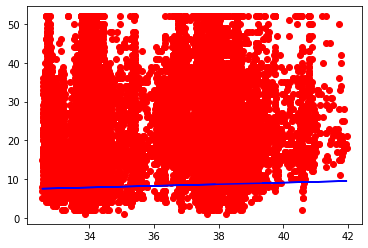

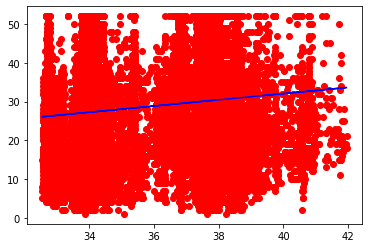

In [85]:
#importation des libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot

#fonction du gradient descendente 
def GD(x,y,learningRate,limit):
    #m et b sont les coeffs du droite y = m*x + b
    m = np.random.random_sample() 
    b = np.random.random_sample()
    n = x.size #la taille du dataset
    deltaM = 0 #deltaM et deltaB sont les valeurs du gradient dont un point i 
    deltaB = 0
    error = 1000.0 #l'erreur commit à chaque prédiction
    for element in range(n):
        error = m*x[element] + b - y[element] #l'erreur = prediction - reponse_connue
        if(error < limit): #si l'erreur devient plus petit que le seuil on arréte l'algorithm
            break
        else:
            deltaM =deltaM +  1/n * x[element] * error #la dérivé du fonction selon m
            deltaB =deltaB + 1/n * error  #la dérivé du fonction selon b
    #calcule des coeffs finaux du regréssion
    m = m + learningRate * deltaM
    b = b + learningRate * deltaB 
    
    Y = m*x + b #la matrice du courbe 
    #la représentation graphique des points et de la droite
    pyplot.scatter(x, y, color='red')
    pyplot.plot(x,Y, color = 'blue')  
    pyplot.show()
#méthode des moindres carrées ordinaires
def MCO(x,y):
    #creation des lists
    X = np.array(x)   
    Y = np.array(y)
    #Calcule des coefficients par la méthode algébrique  A = (transpose(X)*X)^-1 * transpose(X) * Y
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    #Prediction de l'hypothése
    yhat = X.dot(b)
    #représentation graphique
    pyplot.scatter(X, y, color='red')
    pyplot.plot(X, yhat, color='blue')
    pyplot.show()

#variables temps pour stocker les données du dataset
X = []
Y = []
choice = int(input('vous voulez utiliser un fichier csv ou bien entrer les valeurs?\n 1 - utiliser fishier csv \n 2 - utiliser des valeurs \n'))
if choice == 1 :
    name = input('veuillez saisir le nom de votre fichier comme fichier.csv')
    #il faut tester s'il y'a une ligne pour les noms des colonnes pour ne pas traiter des caractéres comme float
    isHeader = int(input('le fichier csv contient un header? \n 1 - oui \n 2 - non \n'))
    if isHeader == 1 :
        data = pd.read_csv(name)
        dataset = data.to_numpy()
        # list pour stockers la ligne header
        list_of_column_names = [] 
        i = 1 #indice donner à chaque colonne 
        # loop pour itéré le fichier csv
        for row in data: 
            # l'ajout du premiér ligne du fichier
            list_of_column_names.append(row) 

        columns = ''
        for element in list_of_column_names: #creation du chaine à afficher contennant les noms et les indices de chaque colonne
            columns= columns + str(i) + '-'+ element + '  '
            i = i + 1
        print(columns)
        cols = input('entrer les deux colonnes à étudier comme numCol1,numCol2 \n')
        cols.split(',')
    elif isHeader == 2:
        dataset = pd.read_csv(name,header=None).to_numpy()
        cols = input('entrer les deux colonnes à étudier comme numCol1,numCol2 \n')
        cols.split(',')
    #on découpe les données en deux axes 
    for element in range(len(dataset)):
        X.append([dataset[element][int(cols[0])-1]])
        Y.append([dataset[element][int(cols[2])-1]])#on saute la 2em case dont elle contient ','
        
elif choice == 2:
    #si on veut seulement tester qlqs pts 
    len  = input('enter the size of the dataset \n')
    for i in range(int(len)):
        x = input("enter x value : ")   
        y = input("enter y value : ")
        if(x.isnumeric):
            X.append([float(x)])  
        if(y.isnumeric):
            Y.append([float(y)])
#transformation en des numpy arrays
x = np.array(X) 
y = np.array(Y)
method = input('Quel methode voulez vous utiliser : \n 1 - MCO \n 2 - GD \n')
if method == '1' :
    MCO(x,y)
elif method == '2' :
    GD(x,y,0.01,0.001)
else :
    print('choix non compris, les deux methodes seront appliqué')
    GD(x,y,0.01,0.001)
    MCO(x,y)